In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive
from Code.UCBLearnerSlidingWindow import UCBLearnerSlidingWindow

%matplotlib inline

In [2]:
cust_json = "customer3_n_s.json"
today_customer = 150
var_cust = 5
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 1

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[1, 1, 1, 1, 1]
t:  2
phase 0
[2, 0, 0, 1, 0]
t:  3
phase 0
[0, 3, 1, 0, 2]
t:  4
phase 0
[2, 1, 2, 0, 1]
t:  5
phase 0
[3, 0, 3, 3, 2]
t:  6
phase 0
[2, 3, 0, 1, 1]
t:  7
phase 0
[2, 2, 2, 1, 3]
t:  8
phase 0
[2, 1, 1, 2, 2]
t:  9
phase 0
loading: [=                             ] 3.3%
[2, 3, 1, 0, 1]
t:  10
phase 0
[2, 1, 1, 0, 0]
t:  11
phase 0
[2, 1, 1,

[2, 1, 3, 0, 2]
t:  197
phase 1
[2, 2, 3, 0, 2]
t:  198
phase 1
[2, 2, 3, 1, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 3, 2, 1, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.01 0.53 0.08]
 [0.01 0.5  0.02 0.  ]
 [0.   0.   0.1  0.62]
 [0.04 0.8  0.04 0.  ]
 [0.   0.07 0.5  0.07]]
conv_rate: [[0.   0.   0.03 0.6 ]
 [0.   0.   0.03 0.36]
 [0.   0.24 0.13 0.  ]
 [0.24 0.05 0.   0.  ]
 [0.49 0.16 0.   0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
[2, 2, 0, 1, 2]
t:  201
phase 2
[2, 2, 1, 1, 3]
t:  202
phase 2
[2, 0, 3, 1, 2]
t:  203
phase 2
[2, 2, 3, 1, 2]
t:  204
phase 2
[2, 2, 3, 1, 2]
t:  205
phase 2
[2, 1, 3, 1, 2]
t:  206
phase 2
[2, 1, 3, 1, 2]
t:  207
phase 2
[2, 1, 3, 1, 2]
t:  208
phase 2
[2, 1, 3, 1, 2]
t:  209
phase 2
loading: [=====

(1, 300)

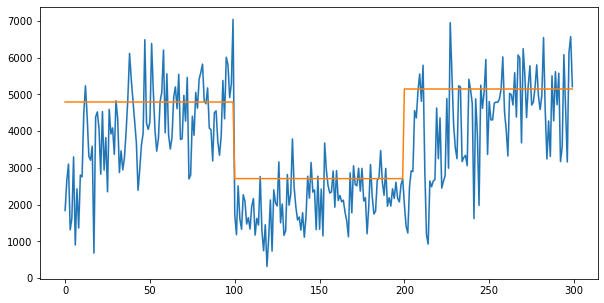

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)


plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

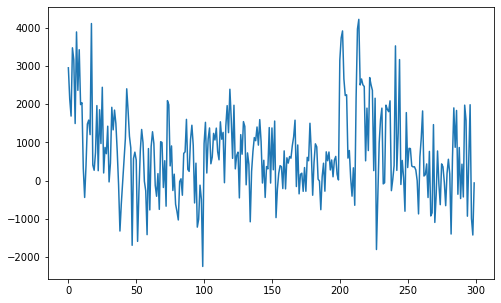

In [7]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

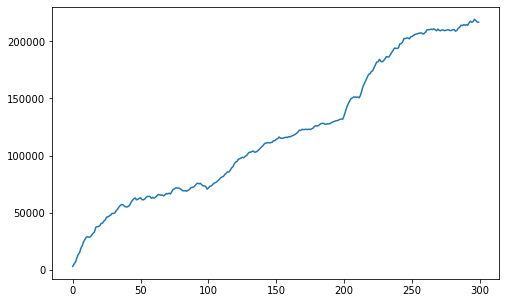

In [8]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [9]:
n_products

5

In [10]:
n_arms

4

In [11]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [12]:
array

array([[0.8, 0.9, 0.4, 0.2],
       [0.5, 0.1, 0.9, 0.4],
       [0.9, 0.3, 0.1, 0.1],
       [0.3, 0.3, 0.1, 0.4],
       [0.3, 0.9, 0.2, 0.6]])

In [13]:
randrange(0,1)

0

In [14]:
cust_json = "customer3_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   ] 88.9%
loading: [===========================   

In [25]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))

In [26]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerSlidingWindow(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, window_size=40)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  212
phase 2
[2, 2, 2, 2, 2]
t:  213
phase 2
[1, 1, 3, 1, 1]
t:  214
phase 2
[2, 0, 1, 1, 2]
t:  215
phase 2
[3, 1, 1, 2, 0]
t:  216
phase 2
[0, 1, 0, 1, 3]
t:  217
phase 2
[2, 1, 3, 0, 1]
t:  218
phase 2
[3, 3, 2, 3, 0]
t:  219
phase 2
[2, 2, 3, 1, 2]
t:  220
phase 2
[2, 1, 3, 0, 3]
t:  221
phase 2
loading: [=                             ] 3.3%
[2, 1, 3, 1, 2]
t:  222
phase 2
[2, 1, 1, 1, 2]
t:  223
phase 2
[3, 1, 3, 1, 1]
t:  224
phase 2
[2, 3, 3, 1, 0]
t:  225
phase 2
[2, 0, 0, 1, 2]
t:  226
phase 2
[1, 1, 3, 3, 3]
t:  227
phase 2
[2, 1, 2, 1, 2]
t:  228
phase 2
[2, 2, 3, 2, 2]
t:  229
phase 2
[2, 1, 3, 1, 2]
t:  230
phase 2
[2, 1, 3, 1, 2]
t:  231
phase 2
loading: [==                            ] 6.7%
[2, 1, 3, 2, 2]
t:  232
phase 2
[2, 1, 3, 0, 1]
t:  233
phase 2
[3, 1, 3, 1, 2]
t:  234
phase 2
[2, 3, 2, 1, 3]
t:  235
phase 2
[2, 1, 3, 3, 2]
t:  236
phase 2
[2, 1, 3, 1, 0]
t:  237
phase 2
[2, 1, 3, 1, 

[2, 0, 3, 2, 0]
t:  434
phase 4
[2, 2, 3, 3, 2]
t:  435
phase 4
[2, 2, 3, 2, 3]
t:  436
phase 4
[2, 3, 3, 1, 2]
t:  437
phase 4
[2, 1, 3, 1, 2]
t:  438
phase 4
[2, 1, 3, 0, 1]
t:  439
phase 4
[3, 1, 3, 0, 3]
t:  440
phase 4
[3, 1, 3, 0, 1]
t:  441
phase 4
loading: [=======================       ] 76.7%
[3, 1, 3, 1, 2]
t:  442
phase 4
[2, 1, 3, 1, 2]
t:  443
phase 4
[3, 1, 3, 1, 2]
t:  444
phase 4
[2, 1, 3, 1, 0]
t:  445
phase 4
[2, 1, 3, 1, 2]
t:  446
phase 4
[2, 1, 3, 1, 2]
t:  447
phase 4
[2, 1, 3, 0, 3]
t:  448
phase 4
[2, 1, 2, 1, 3]
t:  449
phase 4
[2, 1, 3, 3, 3]
t:  450
phase 4
[2, 3, 3, 1, 2]
t:  451
phase 4
loading: [========================      ] 80.0%
[2, 1, 3, 1, 2]
t:  452
phase 4
[2, 1, 3, 2, 2]
t:  453
phase 4
[2, 1, 2, 1, 0]
t:  454
phase 4
[2, 1, 2, 1, 3]
t:  455
phase 4
[2, 0, 1, 1, 2]
t:  456
phase 4
[2, 0, 2, 1, 1]
t:  457
phase 4
[2, 1, 3, 1, 1]
t:  458
phase 4
[3, 2, 3, 2, 2]
t:  459
phase 4
[1, 1, 3, 1, 2]
t:  460
phase 4
[2, 1, 3, 1, 2]
t:  461
phase 4
loading:

(1, 300)

In [16]:
ucb6_learner.reports

[(array([39, 35, 26, 10, 22]), array([20, 11, 10,  3,  7]), [2, 1, 3, 1, 2]),
 (array([29, 23, 24, 15, 20]), array([12,  3,  1,  6,  0]), [2, 3, 1, 1, 1]),
 (array([43, 26, 22, 14, 20]), array([17, 10,  6,  6,  5]), [2, 1, 3, 1, 2]),
 (array([36, 29, 26, 12, 20]), array([12, 11,  4,  3,  2]), [2, 1, 3, 1, 1]),
 (array([31, 31, 20, 14, 24]), array([11, 11,  9,  9,  2]), [2, 1, 3, 1, 1]),
 (array([41, 34, 27,  7, 20]), array([15, 15,  8,  2,  7]), [2, 1, 3, 1, 2]),
 (array([42, 33, 26, 10, 22]), array([18, 15, 13,  5,  4]), [2, 1, 3, 1, 2]),
 (array([35, 35, 25, 15, 16]), array([20, 10,  9,  7,  4]), [2, 1, 3, 1, 1]),
 (array([36, 29, 24, 11, 18]), array([ 4, 10,  3,  4,  2]), [3, 1, 1, 1, 2]),
 (array([29, 33, 24, 11, 25]), array([13,  5,  7,  5,  8]), [2, 3, 3, 1, 2]),
 (array([40, 40, 28,  6, 20]), array([16, 17, 15,  1,  9]), [2, 1, 3, 0, 2]),
 (array([42, 32, 28, 12, 16]), array([ 8, 12, 10,  7,  8]), [3, 1, 3, 1, 2]),
 (array([37, 32, 26,  9, 22]), array([ 5, 11,  3,  3,  6]), [3, 

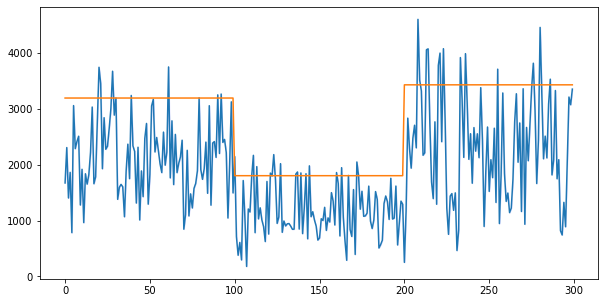

In [17]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

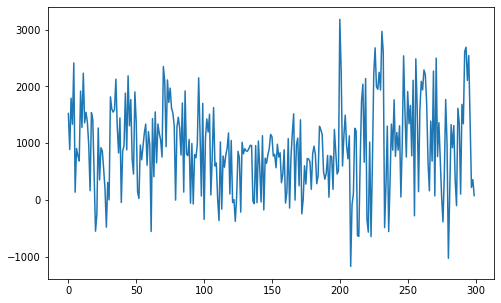

In [18]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

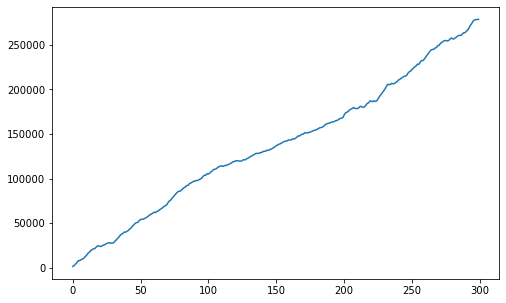

In [19]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

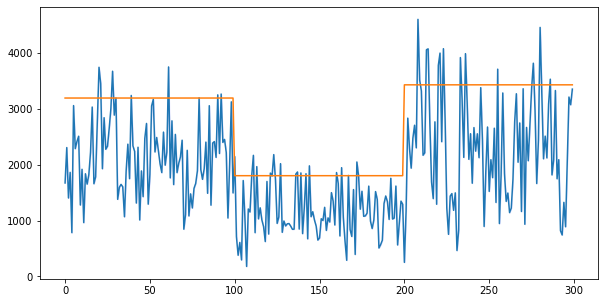

In [20]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

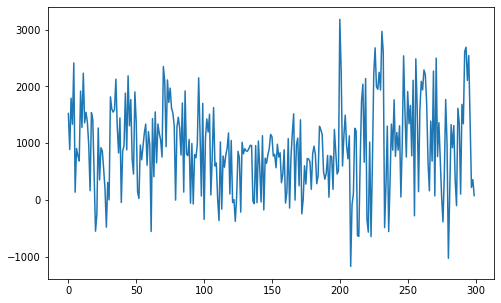

In [21]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

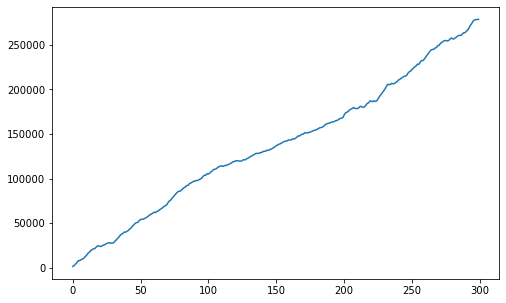

In [22]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [ ]:
plt.savefig('foo.pdf')